In [1]:
from unityagents import UnityEnvironment
import copy
from time import perf_counter

In [2]:
from model import get_model
from helpers import train_model, save_model, plot_losses, plot_scores, test_model, load_model

In [3]:
# hyperparameters
lr = 0.0003
gamma = 0.9

batch_size = 10
buffer_size = 5000

c = 750
c_step = 0
e = 0.01
a = 0.6
b = 0.4
input_depth = 37
hidden0 = 128
hidden1 = 128
hidden2 = 128
output_depth = 4

replay = []

In [4]:
model, loss_fn, optimizer = get_model(input_depth, hidden0, hidden1, hidden2, output_depth, lr)
model_ = copy.deepcopy(model)

In [5]:
env = UnityEnvironment(file_name="Banana.app")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [6]:
# train model
epochs = 2100
epsilon = 1.0  # decays over the course of training
losses = []
scores = []
average_scores = []

hyperparams = (epochs, epsilon, gamma)
actor_env = (model, model_, brain_name, env)
training = (loss_fn, optimizer)
exp_replay = (buffer_size, replay, batch_size)
double_per = (e, a, b, c, c_step)
metrics = (losses, scores, average_scores)

start = perf_counter()
train_model(hyperparams, actor_env, training, exp_replay, double_per,
            metrics, early_stop_target=13.1, early_stop_threshold=5)
save_model(model, optimizer, replay, 'checkpoint-{}.pt'.format(epochs))
end = perf_counter()
print((end - start))

epoch 0, loss: 0.00000, epsilon: 1.00, b: 0.40, avg: 0.00 :: -1.0
epoch 1, loss: 0.00000, epsilon: 1.00, b: 0.40, avg: 0.00 :: 1.0
epoch 2, loss: 0.00000, epsilon: 1.00, b: 0.40, avg: 0.00 :: 1.0
epoch 3, loss: 0.00000, epsilon: 1.00, b: 0.40, avg: 0.00 :: -1.0
epoch 4, loss: 0.00000, epsilon: 1.00, b: 0.40, avg: 0.00 :: 0.0
epoch 5, loss: 0.00000, epsilon: 1.00, b: 0.40, avg: 0.00 :: 1.0
epoch 6, loss: 0.00000, epsilon: 1.00, b: 0.40, avg: 0.00 :: 0.0
epoch 7, loss: 0.00000, epsilon: 1.00, b: 0.40, avg: 0.00 :: 1.0
epoch 8, loss: 0.00000, epsilon: 1.00, b: 0.40, avg: 0.00 :: 0.0
epoch 9, loss: 0.00000, epsilon: 1.00, b: 0.40, avg: 0.00 :: -1.0
epoch 10, loss: 0.00000, epsilon: 1.00, b: 0.40, avg: 0.00 :: 1.0
epoch 11, loss: 0.00000, epsilon: 1.00, b: 0.40, avg: 0.00 :: 0.0
epoch 12, loss: 0.00000, epsilon: 0.99, b: 0.40, avg: 0.00 :: 1.0
epoch 13, loss: 0.00000, epsilon: 0.99, b: 0.40, avg: 0.00 :: 1.0
epoch 14, loss: 0.00000, epsilon: 0.99, b: 0.40, avg: 0.00 :: 0.0
epoch 15, loss: 0

epoch 124, loss: 0.07027, epsilon: 0.95, b: 0.44, avg: 0.26 :: 0.0
epoch 125, loss: 0.07188, epsilon: 0.95, b: 0.44, avg: 0.25 :: 0.0
epoch 126, loss: 0.07316, epsilon: 0.95, b: 0.44, avg: 0.24 :: -1.0
epoch 127, loss: 0.07424, epsilon: 0.95, b: 0.44, avg: 0.24 :: 0.0
epoch 128, loss: 0.07546, epsilon: 0.95, b: 0.44, avg: 0.23 :: 0.0
epoch 129, loss: 0.07660, epsilon: 0.94, b: 0.44, avg: 0.21 :: 0.0
epoch 130, loss: 0.07804, epsilon: 0.94, b: 0.44, avg: 0.22 :: 3.0
epoch 131, loss: 0.07927, epsilon: 0.94, b: 0.44, avg: 0.20 :: 0.0
epoch 132, loss: 0.08071, epsilon: 0.94, b: 0.44, avg: 0.19 :: 1.0
epoch 133, loss: 0.08194, epsilon: 0.94, b: 0.44, avg: 0.21 :: 1.0
epoch 134, loss: 0.08313, epsilon: 0.94, b: 0.44, avg: 0.22 :: 0.0
epoch 135, loss: 0.08394, epsilon: 0.94, b: 0.44, avg: 0.22 :: -1.0
epoch 136, loss: 0.08486, epsilon: 0.94, b: 0.44, avg: 0.22 :: 0.0
epoch 137, loss: 0.08572, epsilon: 0.94, b: 0.44, avg: 0.23 :: 1.0
epoch 138, loss: 0.08670, epsilon: 0.94, b: 0.44, avg: 0.24 

epoch 246, loss: 0.08117, epsilon: 0.89, b: 0.47, avg: 0.20 :: 2.0
epoch 247, loss: 0.08097, epsilon: 0.89, b: 0.47, avg: 0.21 :: 1.0
epoch 248, loss: 0.08079, epsilon: 0.89, b: 0.47, avg: 0.22 :: 1.0
epoch 249, loss: 0.08060, epsilon: 0.89, b: 0.47, avg: 0.19 :: -2.0
epoch 250, loss: 0.08044, epsilon: 0.89, b: 0.47, avg: 0.21 :: 0.0
epoch 251, loss: 0.08029, epsilon: 0.89, b: 0.47, avg: 0.22 :: 1.0
epoch 252, loss: 0.08010, epsilon: 0.89, b: 0.47, avg: 0.22 :: 1.0
epoch 253, loss: 0.07992, epsilon: 0.89, b: 0.47, avg: 0.22 :: 2.0
epoch 254, loss: 0.07980, epsilon: 0.89, b: 0.47, avg: 0.23 :: 1.0
epoch 255, loss: 0.07959, epsilon: 0.89, b: 0.47, avg: 0.22 :: 0.0
epoch 256, loss: 0.07943, epsilon: 0.89, b: 0.47, avg: 0.23 :: 1.0
epoch 257, loss: 0.07932, epsilon: 0.89, b: 0.47, avg: 0.24 :: 1.0
epoch 258, loss: 0.07926, epsilon: 0.89, b: 0.47, avg: 0.26 :: 1.0
epoch 259, loss: 0.07918, epsilon: 0.89, b: 0.47, avg: 0.32 :: 4.0
epoch 260, loss: 0.07909, epsilon: 0.89, b: 0.47, avg: 0.33 :

epoch 369, loss: 0.07046, epsilon: 0.84, b: 0.51, avg: 0.71 :: 2.0
epoch 370, loss: 0.07037, epsilon: 0.84, b: 0.51, avg: 0.72 :: 1.0
epoch 371, loss: 0.07025, epsilon: 0.84, b: 0.51, avg: 0.71 :: 1.0
epoch 372, loss: 0.07015, epsilon: 0.84, b: 0.51, avg: 0.72 :: 0.0
epoch 373, loss: 0.07006, epsilon: 0.84, b: 0.51, avg: 0.74 :: 1.0
epoch 374, loss: 0.06999, epsilon: 0.84, b: 0.51, avg: 0.73 :: -2.0
epoch 375, loss: 0.06992, epsilon: 0.84, b: 0.51, avg: 0.70 :: -1.0
epoch 376, loss: 0.06983, epsilon: 0.84, b: 0.51, avg: 0.70 :: 2.0
epoch 377, loss: 0.06977, epsilon: 0.84, b: 0.51, avg: 0.70 :: 2.0
epoch 378, loss: 0.06977, epsilon: 0.84, b: 0.51, avg: 0.71 :: 2.0
epoch 379, loss: 0.06976, epsilon: 0.84, b: 0.51, avg: 0.68 :: -1.0
epoch 380, loss: 0.06973, epsilon: 0.84, b: 0.51, avg: 0.68 :: 1.0
epoch 381, loss: 0.06968, epsilon: 0.84, b: 0.51, avg: 0.67 :: 0.0
epoch 382, loss: 0.06964, epsilon: 0.84, b: 0.51, avg: 0.69 :: 2.0
epoch 383, loss: 0.06960, epsilon: 0.84, b: 0.51, avg: 0.69

epoch 492, loss: 0.06445, epsilon: 0.79, b: 0.54, avg: 1.31 :: 0.0
epoch 493, loss: 0.06436, epsilon: 0.79, b: 0.54, avg: 1.31 :: 2.0
epoch 494, loss: 0.06430, epsilon: 0.79, b: 0.54, avg: 1.29 :: 0.0
epoch 495, loss: 0.06422, epsilon: 0.79, b: 0.54, avg: 1.29 :: 1.0
epoch 496, loss: 0.06416, epsilon: 0.79, b: 0.54, avg: 1.32 :: 5.0
epoch 497, loss: 0.06409, epsilon: 0.79, b: 0.54, avg: 1.32 :: 0.0
epoch 498, loss: 0.06401, epsilon: 0.79, b: 0.54, avg: 1.28 :: 0.0
epoch 499, loss: 0.06394, epsilon: 0.79, b: 0.54, avg: 1.28 :: 1.0
epoch 500, loss: 0.06386, epsilon: 0.79, b: 0.54, avg: 1.28 :: 3.0
epoch 501, loss: 0.06382, epsilon: 0.79, b: 0.54, avg: 1.27 :: 0.0
epoch 502, loss: 0.06375, epsilon: 0.78, b: 0.54, avg: 1.27 :: 2.0
epoch 503, loss: 0.06368, epsilon: 0.78, b: 0.54, avg: 1.27 :: 1.0
epoch 504, loss: 0.06361, epsilon: 0.78, b: 0.54, avg: 1.26 :: 4.0
epoch 505, loss: 0.06355, epsilon: 0.78, b: 0.54, avg: 1.24 :: 1.0
epoch 506, loss: 0.06349, epsilon: 0.78, b: 0.54, avg: 1.20 ::

epoch 615, loss: 0.06071, epsilon: 0.74, b: 0.58, avg: 1.88 :: 4.0
epoch 616, loss: 0.06067, epsilon: 0.74, b: 0.58, avg: 1.87 :: 3.0
epoch 617, loss: 0.06064, epsilon: 0.74, b: 0.58, avg: 1.89 :: 3.0
epoch 618, loss: 0.06060, epsilon: 0.74, b: 0.58, avg: 1.89 :: 3.0
epoch 619, loss: 0.06056, epsilon: 0.73, b: 0.58, avg: 1.94 :: 5.0
epoch 620, loss: 0.06052, epsilon: 0.73, b: 0.58, avg: 1.93 :: 2.0
epoch 621, loss: 0.06047, epsilon: 0.73, b: 0.58, avg: 1.93 :: 3.0
epoch 622, loss: 0.06043, epsilon: 0.73, b: 0.58, avg: 1.92 :: 4.0
epoch 623, loss: 0.06038, epsilon: 0.73, b: 0.58, avg: 1.93 :: 2.0
epoch 624, loss: 0.06037, epsilon: 0.73, b: 0.58, avg: 1.93 :: 2.0
epoch 625, loss: 0.06032, epsilon: 0.73, b: 0.58, avg: 1.93 :: 3.0
epoch 626, loss: 0.06029, epsilon: 0.73, b: 0.58, avg: 1.97 :: 4.0
epoch 627, loss: 0.06026, epsilon: 0.73, b: 0.58, avg: 1.98 :: 0.0
epoch 628, loss: 0.06023, epsilon: 0.73, b: 0.58, avg: 1.96 :: 0.0
epoch 629, loss: 0.06019, epsilon: 0.73, b: 0.58, avg: 1.95 ::

epoch 738, loss: 0.05728, epsilon: 0.68, b: 0.61, avg: 2.47 :: 1.0
epoch 739, loss: 0.05726, epsilon: 0.68, b: 0.61, avg: 2.49 :: 3.0
epoch 740, loss: 0.05723, epsilon: 0.68, b: 0.61, avg: 2.49 :: 4.0
epoch 741, loss: 0.05721, epsilon: 0.68, b: 0.61, avg: 2.50 :: 5.0
epoch 742, loss: 0.05717, epsilon: 0.68, b: 0.61, avg: 2.47 :: 1.0
epoch 743, loss: 0.05716, epsilon: 0.68, b: 0.61, avg: 2.48 :: 3.0
epoch 744, loss: 0.05713, epsilon: 0.68, b: 0.61, avg: 2.43 :: 0.0
epoch 745, loss: 0.05710, epsilon: 0.68, b: 0.61, avg: 2.42 :: 1.0
epoch 746, loss: 0.05706, epsilon: 0.68, b: 0.61, avg: 2.43 :: 3.0
epoch 747, loss: 0.05703, epsilon: 0.68, b: 0.61, avg: 2.44 :: 3.0
epoch 748, loss: 0.05701, epsilon: 0.68, b: 0.61, avg: 2.44 :: 2.0
epoch 749, loss: 0.05696, epsilon: 0.68, b: 0.61, avg: 2.52 :: 8.0
epoch 750, loss: 0.05693, epsilon: 0.68, b: 0.61, avg: 2.53 :: 4.0
epoch 751, loss: 0.05691, epsilon: 0.68, b: 0.61, avg: 2.53 :: 1.0
epoch 752, loss: 0.05690, epsilon: 0.68, b: 0.61, avg: 2.52 ::

epoch 861, loss: 0.05459, epsilon: 0.63, b: 0.65, avg: 3.40 :: 4.0
epoch 862, loss: 0.05455, epsilon: 0.63, b: 0.65, avg: 3.36 :: 3.0
epoch 863, loss: 0.05452, epsilon: 0.63, b: 0.65, avg: 3.38 :: 6.0
epoch 864, loss: 0.05449, epsilon: 0.63, b: 0.65, avg: 3.40 :: 6.0
epoch 865, loss: 0.05445, epsilon: 0.63, b: 0.65, avg: 3.42 :: 5.0
epoch 866, loss: 0.05443, epsilon: 0.63, b: 0.65, avg: 3.36 :: 1.0
epoch 867, loss: 0.05441, epsilon: 0.63, b: 0.65, avg: 3.41 :: 6.0
epoch 868, loss: 0.05438, epsilon: 0.63, b: 0.65, avg: 3.40 :: 0.0
epoch 869, loss: 0.05434, epsilon: 0.63, b: 0.65, avg: 3.43 :: 5.0
epoch 870, loss: 0.05432, epsilon: 0.63, b: 0.65, avg: 3.50 :: 6.0
epoch 871, loss: 0.05429, epsilon: 0.63, b: 0.65, avg: 3.51 :: 5.0
epoch 872, loss: 0.05426, epsilon: 0.63, b: 0.65, avg: 3.52 :: 5.0
epoch 873, loss: 0.05424, epsilon: 0.63, b: 0.65, avg: 3.52 :: 4.0
epoch 874, loss: 0.05422, epsilon: 0.63, b: 0.65, avg: 3.47 :: 1.0
epoch 875, loss: 0.05420, epsilon: 0.62, b: 0.65, avg: 3.51 ::

epoch 984, loss: 0.05220, epsilon: 0.58, b: 0.68, avg: 4.17 :: 4.0
epoch 985, loss: 0.05219, epsilon: 0.58, b: 0.68, avg: 4.24 :: 10.0
epoch 986, loss: 0.05218, epsilon: 0.58, b: 0.68, avg: 4.24 :: 4.0
epoch 987, loss: 0.05217, epsilon: 0.58, b: 0.68, avg: 4.23 :: 4.0
epoch 988, loss: 0.05215, epsilon: 0.58, b: 0.68, avg: 4.24 :: 4.0
epoch 989, loss: 0.05213, epsilon: 0.58, b: 0.68, avg: 4.25 :: 5.0
epoch 990, loss: 0.05211, epsilon: 0.58, b: 0.68, avg: 4.24 :: 4.0
epoch 991, loss: 0.05209, epsilon: 0.58, b: 0.68, avg: 4.25 :: 5.0
epoch 992, loss: 0.05206, epsilon: 0.57, b: 0.68, avg: 4.16 :: 1.0
epoch 993, loss: 0.05204, epsilon: 0.57, b: 0.68, avg: 4.13 :: 3.0
epoch 994, loss: 0.05203, epsilon: 0.57, b: 0.68, avg: 4.14 :: 6.0
epoch 995, loss: 0.05200, epsilon: 0.57, b: 0.68, avg: 4.15 :: 5.0
epoch 996, loss: 0.05198, epsilon: 0.57, b: 0.68, avg: 4.19 :: 6.0
epoch 997, loss: 0.05194, epsilon: 0.57, b: 0.68, avg: 4.23 :: 6.0
epoch 998, loss: 0.05193, epsilon: 0.57, b: 0.69, avg: 4.27 :

epoch 1105, loss: 0.04985, epsilon: 0.53, b: 0.72, avg: 4.90 :: 3.0
epoch 1106, loss: 0.04984, epsilon: 0.53, b: 0.72, avg: 4.90 :: 3.0
epoch 1107, loss: 0.04984, epsilon: 0.53, b: 0.72, avg: 4.94 :: 8.0
epoch 1108, loss: 0.04984, epsilon: 0.53, b: 0.72, avg: 4.97 :: 7.0
epoch 1109, loss: 0.04983, epsilon: 0.52, b: 0.72, avg: 5.04 :: 8.0
epoch 1110, loss: 0.04981, epsilon: 0.52, b: 0.72, avg: 5.05 :: 3.0
epoch 1111, loss: 0.04978, epsilon: 0.52, b: 0.72, avg: 5.06 :: 6.0
epoch 1112, loss: 0.04978, epsilon: 0.52, b: 0.72, avg: 5.04 :: 4.0
epoch 1113, loss: 0.04978, epsilon: 0.52, b: 0.72, avg: 5.09 :: 10.0
epoch 1114, loss: 0.04976, epsilon: 0.52, b: 0.72, avg: 5.07 :: 6.0
epoch 1115, loss: 0.04975, epsilon: 0.52, b: 0.72, avg: 5.06 :: 4.0
epoch 1116, loss: 0.04976, epsilon: 0.52, b: 0.72, avg: 5.08 :: 6.0
epoch 1117, loss: 0.04975, epsilon: 0.52, b: 0.72, avg: 5.10 :: 3.0
epoch 1118, loss: 0.04974, epsilon: 0.52, b: 0.72, avg: 5.04 :: 5.0
epoch 1119, loss: 0.04973, epsilon: 0.52, b: 0.

epoch 1226, loss: 0.04810, epsilon: 0.47, b: 0.75, avg: 6.27 :: 6.0
epoch 1227, loss: 0.04809, epsilon: 0.47, b: 0.75, avg: 6.21 :: 3.0
epoch 1228, loss: 0.04807, epsilon: 0.47, b: 0.75, avg: 6.29 :: 10.0
epoch 1229, loss: 0.04805, epsilon: 0.47, b: 0.75, avg: 6.29 :: 6.0
epoch 1230, loss: 0.04804, epsilon: 0.47, b: 0.75, avg: 6.31 :: 7.0
epoch 1231, loss: 0.04802, epsilon: 0.47, b: 0.75, avg: 6.25 :: 4.0
epoch 1232, loss: 0.04802, epsilon: 0.47, b: 0.75, avg: 6.33 :: 11.0
epoch 1233, loss: 0.04800, epsilon: 0.47, b: 0.75, avg: 6.37 :: 7.0
epoch 1234, loss: 0.04798, epsilon: 0.47, b: 0.75, avg: 6.44 :: 9.0
epoch 1235, loss: 0.04798, epsilon: 0.47, b: 0.75, avg: 6.48 :: 9.0
epoch 1236, loss: 0.04796, epsilon: 0.47, b: 0.75, avg: 6.52 :: 11.0
epoch 1237, loss: 0.04794, epsilon: 0.47, b: 0.75, avg: 6.50 :: 7.0
epoch 1238, loss: 0.04793, epsilon: 0.47, b: 0.75, avg: 6.48 :: 8.0
epoch 1239, loss: 0.04791, epsilon: 0.47, b: 0.75, avg: 6.50 :: 3.0
epoch 1240, loss: 0.04791, epsilon: 0.47, b: 

epoch 1347, loss: 0.04672, epsilon: 0.42, b: 0.78, avg: 6.27 :: 6.0
epoch 1348, loss: 0.04672, epsilon: 0.42, b: 0.79, avg: 6.31 :: 8.0
epoch 1349, loss: 0.04671, epsilon: 0.42, b: 0.79, avg: 6.25 :: 2.0
epoch 1350, loss: 0.04670, epsilon: 0.42, b: 0.79, avg: 6.25 :: 4.0
epoch 1351, loss: 0.04669, epsilon: 0.42, b: 0.79, avg: 6.26 :: 10.0
epoch 1352, loss: 0.04669, epsilon: 0.42, b: 0.79, avg: 6.27 :: 10.0
epoch 1353, loss: 0.04668, epsilon: 0.42, b: 0.79, avg: 6.29 :: 9.0
epoch 1354, loss: 0.04669, epsilon: 0.42, b: 0.79, avg: 6.33 :: 10.0
epoch 1355, loss: 0.04669, epsilon: 0.42, b: 0.79, avg: 6.36 :: 8.0
epoch 1356, loss: 0.04669, epsilon: 0.42, b: 0.79, avg: 6.43 :: 13.0
epoch 1357, loss: 0.04669, epsilon: 0.42, b: 0.79, avg: 6.40 :: 5.0
epoch 1358, loss: 0.04670, epsilon: 0.42, b: 0.79, avg: 6.38 :: 4.0
epoch 1359, loss: 0.04670, epsilon: 0.42, b: 0.79, avg: 6.40 :: 6.0
epoch 1360, loss: 0.04669, epsilon: 0.42, b: 0.79, avg: 6.48 :: 12.0
epoch 1361, loss: 0.04668, epsilon: 0.42, b

epoch 1467, loss: 0.04550, epsilon: 0.37, b: 0.82, avg: 8.09 :: 7.0
epoch 1468, loss: 0.04548, epsilon: 0.37, b: 0.82, avg: 8.07 :: 7.0
epoch 1469, loss: 0.04547, epsilon: 0.37, b: 0.82, avg: 8.11 :: 9.0
epoch 1470, loss: 0.04545, epsilon: 0.37, b: 0.82, avg: 8.10 :: 3.0
epoch 1471, loss: 0.04544, epsilon: 0.37, b: 0.82, avg: 7.96 :: 1.0
epoch 1472, loss: 0.04543, epsilon: 0.37, b: 0.82, avg: 7.91 :: 7.0
epoch 1473, loss: 0.04541, epsilon: 0.37, b: 0.82, avg: 7.95 :: 12.0
epoch 1474, loss: 0.04540, epsilon: 0.37, b: 0.82, avg: 8.00 :: 10.0
epoch 1475, loss: 0.04539, epsilon: 0.37, b: 0.82, avg: 8.02 :: 9.0
epoch 1476, loss: 0.04537, epsilon: 0.37, b: 0.82, avg: 7.98 :: 5.0
epoch 1477, loss: 0.04536, epsilon: 0.37, b: 0.82, avg: 7.91 :: 3.0
epoch 1478, loss: 0.04535, epsilon: 0.37, b: 0.82, avg: 7.90 :: 8.0
epoch 1479, loss: 0.04533, epsilon: 0.37, b: 0.82, avg: 7.91 :: 12.0
epoch 1480, loss: 0.04533, epsilon: 0.37, b: 0.82, avg: 7.92 :: 9.0
epoch 1481, loss: 0.04532, epsilon: 0.37, b: 

epoch 1587, loss: 0.04441, epsilon: 0.32, b: 0.85, avg: 9.19 :: 2.0
epoch 1588, loss: 0.04441, epsilon: 0.32, b: 0.85, avg: 9.20 :: 11.0
epoch 1589, loss: 0.04440, epsilon: 0.32, b: 0.85, avg: 9.17 :: 11.0
epoch 1590, loss: 0.04439, epsilon: 0.32, b: 0.85, avg: 9.27 :: 13.0
epoch 1591, loss: 0.04439, epsilon: 0.32, b: 0.85, avg: 9.19 :: 9.0
epoch 1592, loss: 0.04438, epsilon: 0.32, b: 0.85, avg: 9.14 :: 5.0
epoch 1593, loss: 0.04438, epsilon: 0.32, b: 0.86, avg: 9.19 :: 7.0
epoch 1594, loss: 0.04437, epsilon: 0.32, b: 0.86, avg: 9.17 :: 5.0
epoch 1595, loss: 0.04437, epsilon: 0.32, b: 0.86, avg: 9.10 :: 7.0
epoch 1596, loss: 0.04436, epsilon: 0.32, b: 0.86, avg: 9.15 :: 10.0
epoch 1597, loss: 0.04435, epsilon: 0.32, b: 0.86, avg: 9.06 :: 4.0
epoch 1598, loss: 0.04434, epsilon: 0.32, b: 0.86, avg: 9.08 :: 5.0
epoch 1599, loss: 0.04433, epsilon: 0.31, b: 0.86, avg: 9.06 :: 5.0
epoch 1600, loss: 0.04434, epsilon: 0.31, b: 0.86, avg: 9.00 :: 3.0
epoch 1601, loss: 0.04433, epsilon: 0.31, b:

epoch 1707, loss: 0.04340, epsilon: 0.27, b: 0.89, avg: 9.09 :: 12.0
epoch 1708, loss: 0.04339, epsilon: 0.27, b: 0.89, avg: 9.08 :: 7.0
epoch 1709, loss: 0.04338, epsilon: 0.27, b: 0.89, avg: 9.08 :: 7.0
epoch 1710, loss: 0.04338, epsilon: 0.27, b: 0.89, avg: 9.04 :: 11.0
epoch 1711, loss: 0.04337, epsilon: 0.27, b: 0.89, avg: 9.02 :: 8.0
epoch 1712, loss: 0.04336, epsilon: 0.27, b: 0.89, avg: 9.07 :: 11.0
epoch 1713, loss: 0.04335, epsilon: 0.27, b: 0.89, avg: 9.07 :: 7.0
epoch 1714, loss: 0.04335, epsilon: 0.27, b: 0.89, avg: 9.15 :: 13.0
epoch 1715, loss: 0.04334, epsilon: 0.26, b: 0.89, avg: 9.05 :: 8.0
epoch 1716, loss: 0.04333, epsilon: 0.26, b: 0.89, avg: 9.03 :: 9.0
epoch 1717, loss: 0.04332, epsilon: 0.26, b: 0.89, avg: 9.09 :: 12.0
epoch 1718, loss: 0.04330, epsilon: 0.26, b: 0.89, avg: 9.13 :: 12.0
epoch 1719, loss: 0.04329, epsilon: 0.26, b: 0.89, avg: 9.23 :: 19.0
epoch 1720, loss: 0.04329, epsilon: 0.26, b: 0.89, avg: 9.25 :: 9.0
epoch 1721, loss: 0.04328, epsilon: 0.26,

epoch 1826, loss: 0.04242, epsilon: 0.22, b: 0.92, avg: 10.35 :: 13.0
epoch 1827, loss: 0.04242, epsilon: 0.22, b: 0.92, avg: 10.39 :: 18.0
epoch 1828, loss: 0.04241, epsilon: 0.22, b: 0.92, avg: 10.45 :: 10.0
epoch 1829, loss: 0.04240, epsilon: 0.22, b: 0.92, avg: 10.52 :: 14.0
epoch 1830, loss: 0.04239, epsilon: 0.22, b: 0.92, avg: 10.63 :: 14.0
epoch 1831, loss: 0.04239, epsilon: 0.22, b: 0.92, avg: 10.65 :: 8.0
epoch 1832, loss: 0.04239, epsilon: 0.21, b: 0.92, avg: 10.59 :: 5.0
epoch 1833, loss: 0.04239, epsilon: 0.21, b: 0.92, avg: 10.59 :: 8.0
epoch 1834, loss: 0.04238, epsilon: 0.21, b: 0.92, avg: 10.46 :: 6.0
epoch 1835, loss: 0.04237, epsilon: 0.21, b: 0.92, avg: 10.51 :: 15.0
epoch 1836, loss: 0.04237, epsilon: 0.21, b: 0.92, avg: 10.47 :: 11.0
epoch 1837, loss: 0.04236, epsilon: 0.21, b: 0.92, avg: 10.48 :: 13.0
epoch 1838, loss: 0.04236, epsilon: 0.21, b: 0.93, avg: 10.50 :: 12.0
epoch 1839, loss: 0.04235, epsilon: 0.21, b: 0.93, avg: 10.51 :: 10.0
epoch 1840, loss: 0.0423

epoch 1944, loss: 0.04167, epsilon: 0.17, b: 0.96, avg: 11.93 :: 5.0
epoch 1945, loss: 0.04167, epsilon: 0.17, b: 0.96, avg: 11.88 :: 5.0
epoch 1946, loss: 0.04166, epsilon: 0.17, b: 0.96, avg: 11.98 :: 11.0
epoch 1947, loss: 0.04165, epsilon: 0.17, b: 0.96, avg: 11.94 :: 11.0
epoch 1948, loss: 0.04164, epsilon: 0.17, b: 0.96, avg: 12.00 :: 20.0
epoch 1949, loss: 0.04164, epsilon: 0.16, b: 0.96, avg: 12.01 :: 10.0
epoch 1950, loss: 0.04163, epsilon: 0.16, b: 0.96, avg: 12.04 :: 14.0
epoch 1951, loss: 0.04163, epsilon: 0.16, b: 0.96, avg: 12.00 :: 10.0
epoch 1952, loss: 0.04162, epsilon: 0.16, b: 0.96, avg: 12.04 :: 17.0
epoch 1953, loss: 0.04160, epsilon: 0.16, b: 0.96, avg: 12.07 :: 9.0
epoch 1954, loss: 0.04159, epsilon: 0.16, b: 0.96, avg: 12.08 :: 11.0
epoch 1955, loss: 0.04159, epsilon: 0.16, b: 0.96, avg: 12.11 :: 18.0
epoch 1956, loss: 0.04158, epsilon: 0.16, b: 0.96, avg: 12.12 :: 16.0
epoch 1957, loss: 0.04158, epsilon: 0.16, b: 0.96, avg: 12.08 :: 7.0
epoch 1958, loss: 0.0415

epoch 2062, loss: 0.04083, epsilon: 0.12, b: 0.99, avg: 11.62 :: 8.0
epoch 2063, loss: 0.04082, epsilon: 0.12, b: 0.99, avg: 11.66 :: 16.0
epoch 2064, loss: 0.04082, epsilon: 0.12, b: 0.99, avg: 11.72 :: 18.0
epoch 2065, loss: 0.04082, epsilon: 0.11, b: 0.99, avg: 11.64 :: 2.0
epoch 2066, loss: 0.04081, epsilon: 0.11, b: 0.99, avg: 11.73 :: 16.0
epoch 2067, loss: 0.04081, epsilon: 0.11, b: 0.99, avg: 11.68 :: 7.0
epoch 2068, loss: 0.04080, epsilon: 0.11, b: 0.99, avg: 11.71 :: 15.0
epoch 2069, loss: 0.04079, epsilon: 0.11, b: 0.99, avg: 11.78 :: 18.0
epoch 2070, loss: 0.04078, epsilon: 0.11, b: 0.99, avg: 11.81 :: 18.0
epoch 2071, loss: 0.04077, epsilon: 0.11, b: 0.99, avg: 11.89 :: 17.0
epoch 2072, loss: 0.04076, epsilon: 0.11, b: 0.99, avg: 12.00 :: 17.0
epoch 2073, loss: 0.04075, epsilon: 0.11, b: 0.99, avg: 12.00 :: 11.0
epoch 2074, loss: 0.04075, epsilon: 0.11, b: 0.99, avg: 12.09 :: 15.0
epoch 2075, loss: 0.04074, epsilon: 0.11, b: 0.99, avg: 12.16 :: 14.0
epoch 2076, loss: 0.040

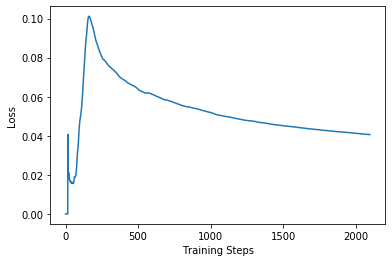

<Figure size 432x288 with 0 Axes>

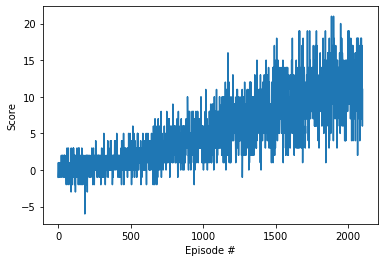

<Figure size 432x288 with 0 Axes>

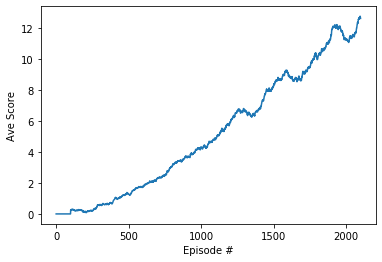

<Figure size 432x288 with 0 Axes>

In [7]:
# evaluate training
plot_losses(losses, 'losses-{}.png'.format(epochs), show=True)
plot_scores(scores, 'scores-{}.png'.format(epochs), show=True)
plot_scores(average_scores, 'ave-scores-{}.png'.format(epochs), plotName='Ave Score', show=True)

Avg. score: 10.84, with a high of: 25.0


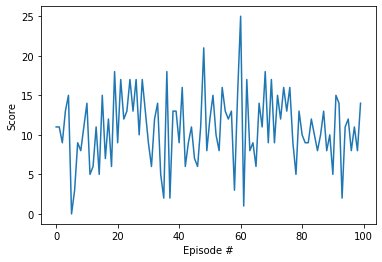

In [8]:
# test model
test_actor_env = (model, brain_name, env)
attemps = 100
filename = 'test_scores-{}.png'.format(attemps)

test_model(test_actor_env, attemps, filename, viewableSpeed=False)

In [9]:
env.close()